# Introducción a las redes neuronales profundas
# Proyecto 2 

Clasificar los vectores x1 y x2 usando backpropagation en una red neuronal shallow, para ello usar los siguientes métodos:

1. Usando SDBP
2. Método de momento
3. Método de Levenberg-Marquardt

In [301]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils import to_categorical
%matplotlib inline

In [2]:
x1 = np.array([[-4,-3],[-4,-1],[-3,-3],[-3,-1],[-3,0],[-2,-2],[0,-1],[1,-1],[1,0],[1,2],
               [2,-1],[2,1],[2,2],[2,3],[2,4],[3,-4],[3,-3],[3,-2],[3,-1],[4,-1]])

x2 = np.array([[-1,-4],[-1,-3],[-1,2],[-1,3],[-1,4],[0,-4],[0,-3],[0,2],[1,-5],[1,-4],
               [1,4],[3,2],[3,3],[4,1],[4,2]])

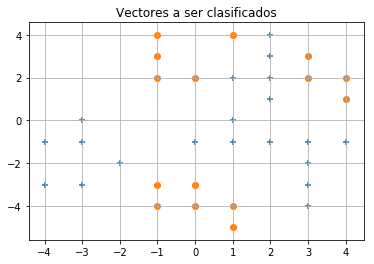

In [30]:
plt.scatter(x1[:,0], x1[:,1], marker='+')
plt.scatter(x2[:,0], x2[:,1], marker='o')
plt.title('Vectores a ser clasificados')
plt.grid(True)
plt.show()

In [302]:
X = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(20), np.ones(15)))
y_binary = to_categorical(y)

### Método SDBP

In [303]:
net1 = Sequential()
net1.add(Dense(30, activation='tanh', input_shape=(2,)))
net1.add(Dense(30, activation='relu'))
net1.add(Dense(2, activation='softmax'))

In [305]:
net1.compile(optimizer=SGD(lr=0.01), 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [306]:
net1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_99 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_100 (Dense)            (None, 2)                 62        
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________


In [307]:
history1 = net1.fit(X, y_binary, epochs=100, batch_size=1)

Epoch 1/100
35/35 [==============================] - 1s 25ms/step - loss: 0.7568 - acc: 0.4286
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6311 - acc: 0.6286
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5840 - acc: 0.7714
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5539 - acc: 0.7429
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5151 - acc: 0.7143
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4977 - acc: 0.7714
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4575 - acc: 0.8571
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4646 - acc: 0.7714
Epoch 9/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4417 - acc: 0.8286
Epoch 10/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4245 - acc: 0.8286
Epoch 11/100
35/35 [==============================] - 0s 2

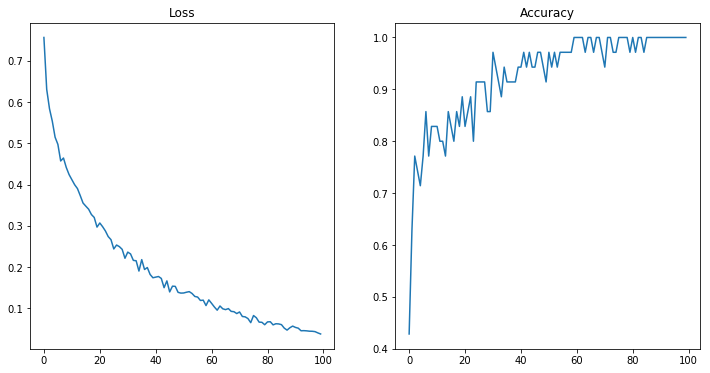

In [308]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history1.epoch, history1.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(history1.epoch, history1.history['acc'])
plt.title('Accuracy')
plt.show()

In [326]:
xx.

ValueError: cannot reshape array of size 250000 into shape (1,)

In [395]:
steps = 500
xx, yy = np.meshgrid(np.linspace(-8, 8, steps), np.linspace(-8, 8, steps))

xxyy = np.hstack((xx.reshape(steps*steps, 1), yy.reshape(steps*steps, 1)))
grid_prediction = np.argmax(net1.predict(xxyy), axis=1)
grid_prediction.shape = (steps, steps)

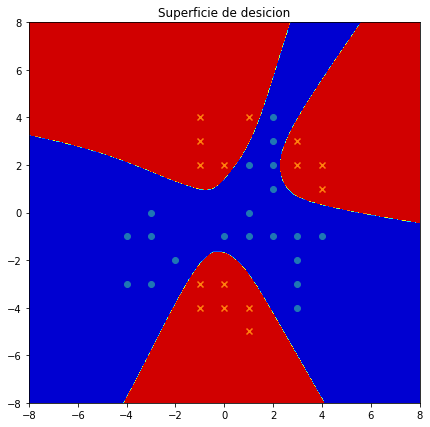

In [396]:
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, grid_prediction, cmap='jet')
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1], marker='x')
plt.title('Superficie de desicion')
plt.show()

In [363]:
x = 0
y = 0

v = np.argmax(net1.predict(np.array([[x,y], [5,2]])), axis=1)

print(v)
print(np.array([[x,y]]).shape)

[0 1]
(1, 2)


### Método de momento

In [406]:
net2 = Sequential()
net2.add(Dense(30, activation='tanh', input_shape=(2,)))
net2.add(Dense(30, activation='relu'))
net2.add(Dense(2, activation='softmax'))

In [407]:
net2.compile(optimizer=SGD(lr=0.01, momentum=0.4), 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [408]:
history2 = net2.fit(X, y_binary, epochs=55, batch_size=1, shuffle=True)

Epoch 1/55
35/35 [==============================] - 1s 25ms/step - loss: 0.6795 - acc: 0.6000
Epoch 2/55
35/35 [==============================] - 0s 2ms/step - loss: 0.6294 - acc: 0.5714
Epoch 3/55
35/35 [==============================] - 0s 2ms/step - loss: 0.5803 - acc: 0.6857
Epoch 4/55
35/35 [==============================] - 0s 2ms/step - loss: 0.5553 - acc: 0.8000
Epoch 5/55
35/35 [==============================] - 0s 2ms/step - loss: 0.5190 - acc: 0.7429
Epoch 6/55
35/35 [==============================] - 0s 4ms/step - loss: 0.4974 - acc: 0.8286
Epoch 7/55
35/35 [==============================] - 0s 3ms/step - loss: 0.4764 - acc: 0.7714
Epoch 8/55
35/35 [==============================] - 0s 3ms/step - loss: 0.4624 - acc: 0.8000
Epoch 9/55
35/35 [==============================] - 0s 2ms/step - loss: 0.4435 - acc: 0.8286
Epoch 10/55
35/35 [==============================] - 0s 2ms/step - loss: 0.4159 - acc: 0.8571
Epoch 11/55
35/35 [==============================] - 0s 2ms/step - l

In [409]:
grid_prediction = np.argmax(net2.predict(xxyy), axis=1)
grid_prediction.shape = (steps, steps)

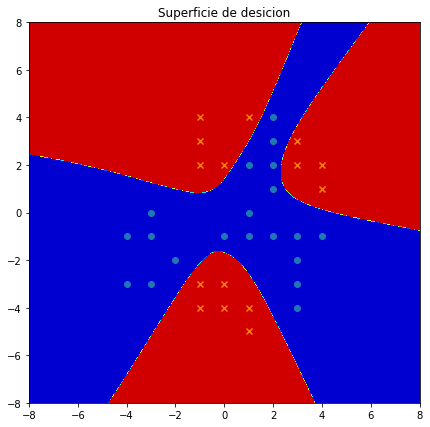

In [410]:
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, grid_prediction, cmap='jet')
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1], marker='x')
plt.title('Superficie de desicion')
plt.show()

### Método de Levenberg-Marquardt